In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [2]:
def generate_dataset(num_samples=5000, img_size=(8, 8)):
    x_input = np.zeros((num_samples, img_size[0], img_size[1]//2, 1))  # Left half as input
    x_ground = np.zeros((num_samples, img_size[0], img_size[1]//2, 1))  # Right half as target

    for i in range(num_samples):
        img = np.random.rand(*img_size)  # Random 8x8 image
        left_half = img[:, :img_size[1]//2]  # Extract left half
        right_half = np.fliplr(left_half)  # Mirror left to get right

        x_input[i, :, :, 0] = left_half  # Store left side
        x_ground[i, :, :, 0] = right_half  # Store right side

    return x_input, x_ground

# Generate the dataset
x_input, x_ground = generate_dataset()

# Normalize data to range [0, 1]
x_input = x_input / np.max(x_input)
x_ground = x_ground / np.max(x_ground)

# Split into training & testing
x_train, x_test, y_train, y_test = train_test_split(x_input, x_ground, test_size=0.2, random_state=42)


In [3]:
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(8, 4, 1)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Output layer
    ])

    model.compile(optimizer='adam', loss='mse')
    return model

# Create the model
model = build_model()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0409 - val_loss: 0.0077
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0013 - val_loss: 9.9726e-04
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 9.7443e-04 - val_loss: 8.2864e-04
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 8.0836e-04 - val_loss: 7.0464e-04
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 7.0112e-04 - val_loss: 6.9130e-04
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 6.3350e-04 - val_loss: 6.8883e-04
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 5.1968e-04 - val_loss: 4.1135e-04
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 4.3303e-04 - val_loss: 3.4855e-04
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 4.2532e-04 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


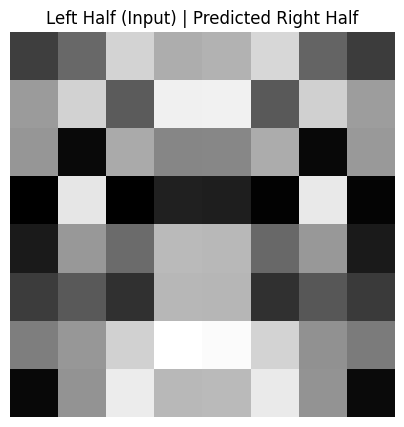

In [6]:
def predict_and_plot(model, x_test, y_test, sample_idx=0):
    test_input = x_test[sample_idx]  # Pick one image from test set
    true_output = y_test[sample_idx]  # True right half

    predicted_output = model.predict(test_input.reshape(1, 8, 4, 1))[0, :, :, 0]  # Predict right half

    # Combine left input with predicted right half
    combined_image = np.hstack((test_input[:, :, 0], predicted_output))

    # Plot results
    plt.figure(figsize=(5, 5))
    plt.imshow(combined_image, cmap='gray')
    plt.title("Left Half (Input) | Predicted Right Half")
    plt.axis('off')
    plt.show()

# Test the model on a sample image
predict_and_plot(model, x_test, y_test)


Saving 1.jpg to 1.jpg


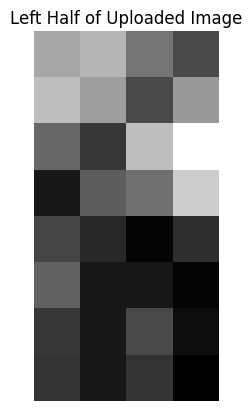

In [9]:
from google.colab import files
uploaded = files.upload()  # This lets you select and upload an image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Get the uploaded filename
image_filename = list(uploaded.keys())[0]

# Load and convert image to grayscale
img = Image.open(image_filename).convert('L')  # Convert to grayscale
img = img.resize((8, 8))  # Resize to 8x8 for consistency
img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]

# Extract left half (8x4)
left_half = img[:, :4]

# Display the left half
plt.imshow(left_half, cmap='gray')
plt.title("Left Half of Uploaded Image")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


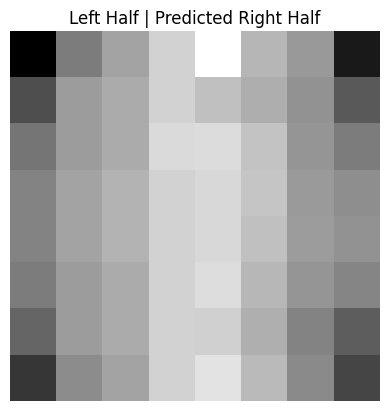

In [8]:
def predict_right_half(left_half):
    left_half = left_half.reshape(1, 8, 4, 1)  # Reshape for model input
    predicted_right = model.predict(left_half)[0, :, :, 0]  # Get prediction
    return predicted_right

# Get predicted right half
predicted_right = predict_right_half(left_half)

# Combine left and predicted right half
full_image = np.hstack((left_half, predicted_right))

# Show the final reconstructed image
plt.imshow(full_image, cmap='gray')
plt.title("Left Half | Predicted Right Half")
plt.axis('off')
plt.show()


Saving 1.jpg to 1 (3).jpg


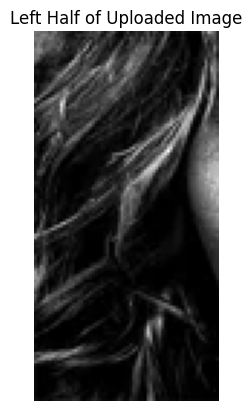

In [12]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Upload an image
uploaded = files.upload()
image_filename = list(uploaded.keys())[0]  # Get uploaded file name

# Load and resize image
img = Image.open(image_filename).convert('L')  # Convert to grayscale
img = img.resize((128, 128))  # Higher resolution for better accuracy
img = np.array(img) / 255.0  # Normalize pixel values

# Extract left half (128x64)
left_half = img[:, :64]

# Display left half
plt.imshow(left_half, cmap='gray')
plt.title("Left Half of Uploaded Image")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


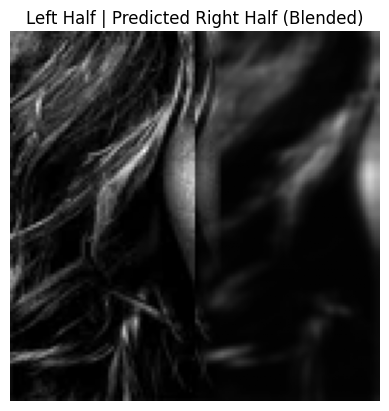

In [13]:
import cv2

def predict_and_blend(model, left_half):
    left_half = left_half.reshape(1, 128, 64, 1)  # Reshape for model
    predicted_right = model.predict(left_half)[0, :, :, 0]  # Get output

    # Apply Gaussian smoothing
    predicted_right = cv2.GaussianBlur(predicted_right, (5, 5), 0)

    # Blend the edges for a smoother transition
    alpha = np.linspace(0, 1, 10).reshape(1, -1)  # Blending factor
    blended_right = predicted_right.copy()
    blended_right[:, :10] = (1 - alpha) * left_half[0, :, -10:, 0] + alpha * predicted_right[:, :10]

    # Combine left and blended right halves
    full_image = np.hstack((left_half[0, :, :, 0], blended_right))

    # Show the final output
    plt.imshow(full_image, cmap='gray')
    plt.title("Left Half | Predicted Right Half (Blended)")
    plt.axis('off')
    plt.show()

# Predict and blend
predict_and_blend(model, left_half)
